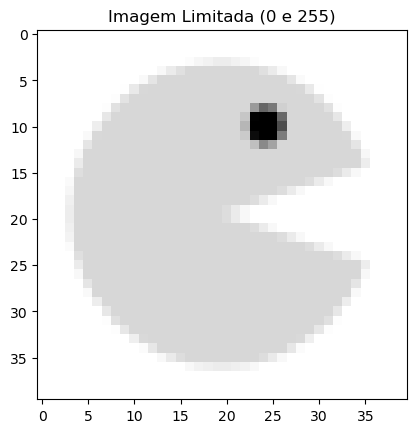

In [4]:
# Importação de Bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Caminho da Imagem
imagem_path = r"C:\Users\Emerson_vts\Downloads\processamento-de-imagem\gg.png"

# Leitura da Imagem em Escala de Cinza
imagem_bw = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Função para Limitar Valores
def limitar_valores(matriz, valor_maximo, valor_minimo):
    return np.clip(matriz, valor_minimo, valor_maximo)

# Aplicação da Função para Limitar Valores à Imagem em Escala de Cinza
imagem_bw_limitada = limitar_valores(imagem_bw, 255, 0)

# Visualização da Imagem Limitada
plt.imshow(imagem_bw_limitada, cmap='gray')
plt.title('Imagem Limitada (0 e 255)')
plt.show()

# Conversão da Imagem Limitada para uma Matriz NumPy
matriz = np.array(imagem_bw_limitada)


In [5]:


# Passo 1: Ordenar a matriz e transformar em uma lista
matriz_ordenada = np.sort(matriz.reshape(-1)).tolist()

# Passo 2: Encontrar a mediana
n = len(matriz_ordenada)
if n % 2 == 0:
    mediana = (matriz_ordenada[n//2 - 1] + matriz_ordenada[n//2]) / 2
else:
    mediana = matriz_ordenada[n//2]

# Passo 3: Dividir a matriz em três grupos
media_baixa = [x for x in matriz_ordenada if x < mediana]
media = [x for x in matriz_ordenada if x == mediana]
media_alta = [x for x in matriz_ordenada if x > mediana]

# Passo 4: Calcular a média de cada grupo
media_baixa_media = np.mean(media_baixa)
media_media = np.mean(media)
media_alta_media = np.mean(media_alta)

# Exibindo os resultados
print("Média Baixa Média:", media_baixa_media)
print("Média Média:", media_media)
print("Média Alta Média:", media_alta_media)

Média Baixa Média: 213.356783919598
Média Média: 248.0
Média Alta Média: 254.9033078880407


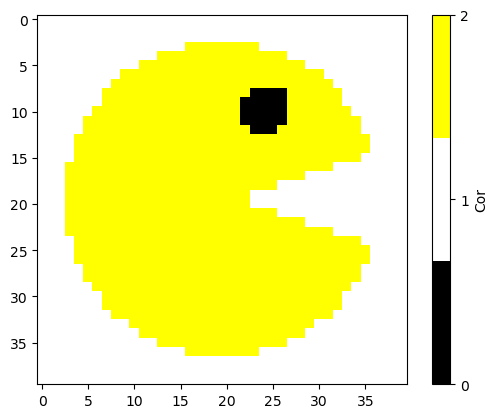

In [4]:
# Itera sobre os pixels da matriz e binariza a imagem (transforma em preto ou branco)
for i in range(40):
    for j in range(40):
        if(matriz[i, j] > media_alta_media):
            matriz[i, j] = 1
        elif(matriz[i, j] < media_alta_media and matriz[i, j] > media_baixa_media):
            matriz[i, j] = 2
        else:
            matriz[i, j] = 0

# Atribuindo cores            
cmap = plt.cm.colors.ListedColormap(['black', 'white', 'yellow'])

# Exibindo a matriz
plt.imshow(matriz, cmap=cmap)

# Exibindo a cor da barra de cores
plt.colorbar(ticks=[0, 1, 2], label='Cor')



In [5]:
def rastreio(x,y, matriz):
    matriz_copia = np.copy(matriz)
    for i in range(40):
        if i != y:
            matriz_copia[x, i] = 0;
        if i !=x:
            matriz_copia[i, y] = 0;
    if matriz[x,y] == 1:
        plt.title(f'a cor na cordenada x={x} e y={y} é branco') 
    elif matriz[x,y] == 2:
        plt.title(f'a cor na cordenada x={x} e y={y} é amarelo')
    elif matriz[x,y] == 0:
        plt.title(f'a cor na cordenada x={x} e y={y} é preto')
    plt.imshow(matriz_copia, cmap=cmap)
    plt.colorbar(ticks=[0, 1, 2], label='Cor')
    
    plt.show()
        
        

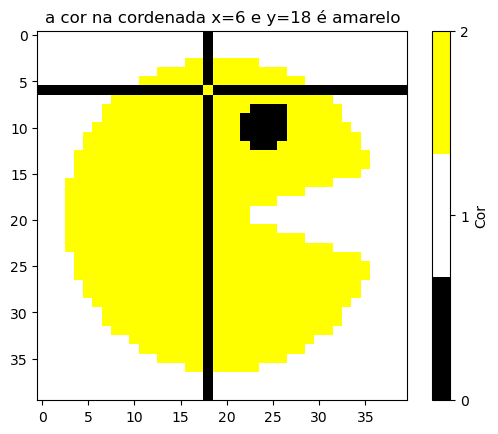

In [7]:
rastreio(6,18,matriz)

In [8]:
df = pd.DataFrame(matriz)
df.to_csv("dados.csv")